# Assignment Day 9

## Team members:
- Samuel Nebgen s6sanebg@uni-bonn.de
- Muhammad Humza Arain s27marai@uni-bonn.de
- Julian Meigen s82jmeig@uni-bonn.de

## 18.09.2025

Contributions were made by all team members in around the same amount, either based on discussions or coding.

# Task 1: Load the Mutagenicity dataset from TUDatasets (https://chrsmrrs.github.io/datasets/docs/datasets/)


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from torch_geometric.datasets import TUDataset

In [ ]:
save_data_path = os.path.join("..", "data", "interim")
dataset = TUDataset(root=save_data_path, name="Mutagenicity")

In [ ]:
len(list(dataset))

4337

# Task 2: Visualize the data by drawing the molecule graph of one sample.


### Using the predefined Code

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from torch_geometric.utils import to_networkx


def draw_molecule(g, edge_mask=None, draw_edge_labels=False):
    g = g.copy().to_undirected()
    node_labels = {}
    for u, data in g.nodes(data=True):
        node_labels[u] = data['name']
    pos = nx.planar_layout(g)
    pos = nx.spring_layout(g, pos=pos)
    if edge_mask is None:
        edge_color = 'black'
        widths = None
    else:
        edge_color = [edge_mask[(u, v)] for u, v in g.edges()]
        widths = [x * 10 for x in edge_color]
    nx.draw(g, pos=pos, labels=node_labels, width=widths,
            edge_color=edge_color, edge_cmap=plt.cm.Blues,
            node_color='azure')
    
    if draw_edge_labels and edge_mask is not None:
        edge_labels = {k: ('%.2f' % v) for k, v in edge_mask.items()}    
        nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels,
                                    font_color='red')
    plt.show()


def to_molecule(data):
    ATOM_MAP = ['C', 'O', 'Cl', 'H', 'N', 'F',
                'Br', 'S', 'P', 'I', 'Na', 'K', 'Li', 'Ca']
    g = to_networkx(data, node_attrs=['x'])
    for u, data in g.nodes(data=True):
        data['name'] = ATOM_MAP[data['x'].index(1.0)]
        del data['x']
    return g

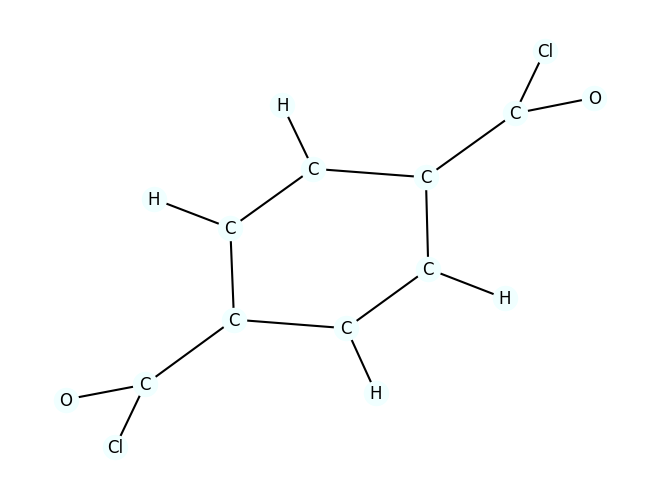

In [ ]:
G = to_molecule(dataset[0])
draw_molecule(G)

### Only using Netwokx

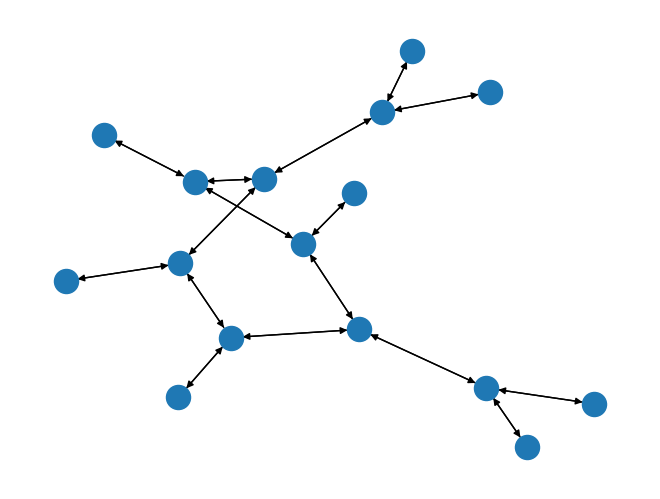

In [ ]:
nx.draw(G)

# Task 3: Train a GNN model with 5 convolutional layers with pytorch-geometric.


## a. Define the model.


## b. Define the train and test function.


## c. Train the model for 100 epochs.


# Task 4: Explain the predictions using the captum package (https://captum.ai/) with the method Integrated Gradients.


## a. Familiarize yourself with the method, and the captum package (https://captum.ai/docs/extension/integrated_gradients). Summarize the method in your own words (5-8sentences).



## b. Calculate the attributions of the input to the model’s predictions.


## c. Visualize your results. Which were the most important inputs for a prediction?


# Task 5: Use the GNNExplainer from pytorch-geometric to explain the model’s predictions.


## a. Familiarize yourself with the method (https://arxiv.org/pdf/1903.03894 ). Summarize the method in your own words (5-8 sentences).


## b. Visualize your results. Choose an interesting prediction and show the most important input.